In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics, datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline


Importing data

In [3]:
data = pd.read_csv("data/austin_weather.csv")


In [4]:
cle_data = data.drop(['Events','Date','SeaLevelPressureHighInches','SeaLevelPressureLowInches'], axis = 1)

cle_data['PrecipitationSumInches'].replace('T','0.001', inplace=True)
print(cle_data.shape)

(1319, 17)


In [5]:
cle_data.drop(cle_data.index[cle_data['TempHighF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['TempAvgF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['TempLowF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['DewPointHighF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['DewPointAvgF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['DewPointLowF'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['HumidityHighPercent'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['HumidityAvgPercent'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['HumidityLowPercent'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['VisibilityHighMiles'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['VisibilityAvgMiles'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['VisibilityLowMiles'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['WindHighMPH'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['WindAvgMPH'] == '-'], inplace = True)
cle_data.drop(cle_data.index[cle_data['WindGustMPH'] == '-'], inplace = True)

C:\Users\User1\Anaconda3\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(cle_data)

      TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF DewPointLowF  \
0            74        60        45            67           49           43   
1            56        48        39            43           36           28   
2            58        45        32            31           27           23   
3            61        46        31            36           28           21   
4            58        50        41            44           40           36   
5            57        48        39            39           36           33   
6            60        53        45            41           39           37   
7            62        51        40            43           39           33   
8            64        50        36            49           41           28   
9            44        40        35            31           26           21   
10           55        46        36            31           28           23   
11           69        54        39            51   

Training and testing the data

In [8]:
train, test = train_test_split(cle_data, test_size=0.2, random_state = 142)
print(test.shape)
print(train.shape)

(264, 17)
(1055, 17)


Results for the trainning and testing data

In [9]:
X_train=train.drop(['PrecipitationSumInches'], axis = 1)
y_train = train['PrecipitationSumInches']
X_test=test.drop(['PrecipitationSumInches'], axis = 1)
y_test = test['PrecipitationSumInches']
print("X_train:" ,X_train.shape)
print("y_train:" ,y_train.shape)
print("X_test:" ,X_test.shape)
print("y_train:" ,y_test.shape)

X_train: (1055, 16)
y_train: (1055,)
X_test: (264, 16)
y_train: (264,)


In [10]:
print(cle_data.columns)

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureAvgInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches'],
      dtype='object')


C:\Users\User1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\User1\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\User1\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:

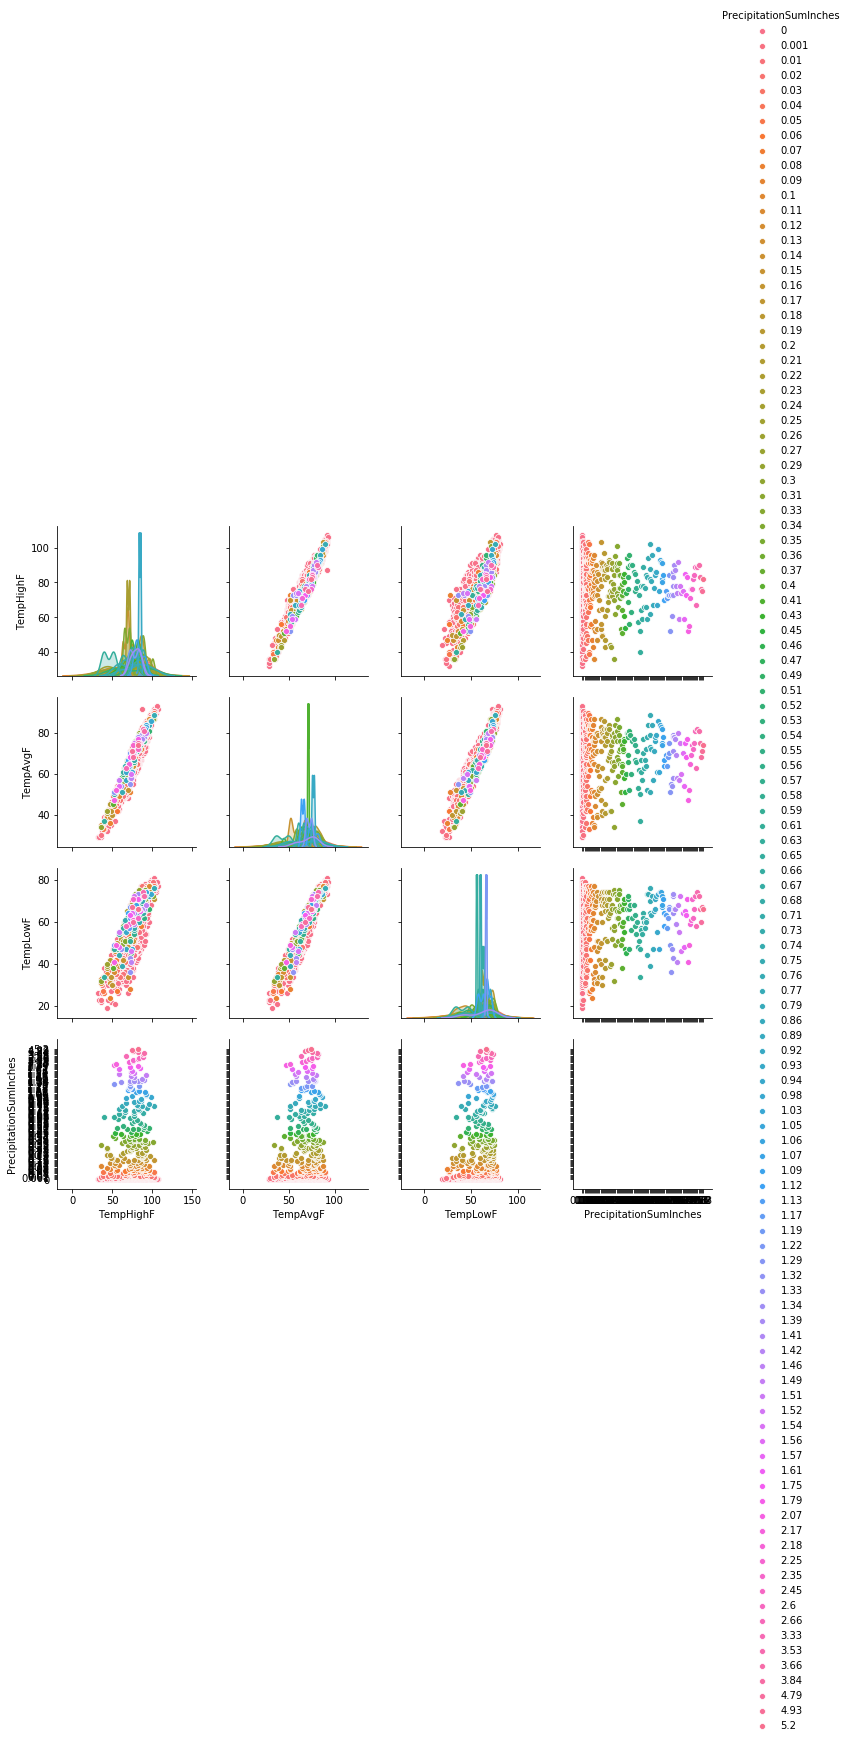

In [11]:
sns.pairplot(cle_data, hue="PrecipitationSumInches")

In [14]:
reg = linear_model.LinearRegression()
X = cle_data[['PrecipitationSumInches']]
y = cle_data[['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureAvgInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH']]
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

ValueError: could not convert string to float: '-'

In [15]:
reg = linear_model.LinearRegression()
X = cle_data[['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureAvgInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH']]
y = cle_data[['PrecipitationSumInches' ]]
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

ValueError: could not convert string to float: '-'

In [16]:
cle_data.shape
cle_data.to_csv(r'Data\cleaned_data.csv')

In [17]:
data = pd.read_csv("data/cleaned_data..csv")

In [18]:
X = data.drop(['PrecipitationSumInches'], axis=1)
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1)

In [19]:
day_index = 798
days = [i for i in range(Y.size)]

In [20]:
clf = LinearRegression()
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
input = np.array([[74], [60], [45], [67], [49], [43], [93], [75], [57], [29.68], [10], [7], [2], [20], [4], [31]])
input = input.reshape(1, -1)
print(clf.predict(input))

[[0.88851029]]


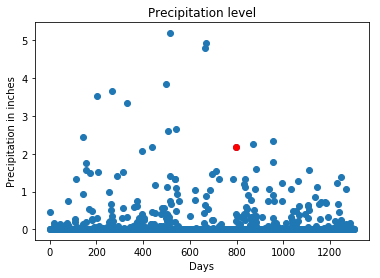

In [22]:
plt.scatter(days, Y)
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()

In [23]:
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)

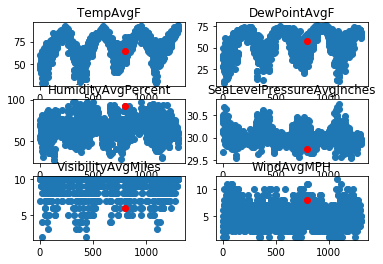

In [24]:
for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days, x_vis[x_vis.columns.values[i]])
    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color='r')
    plt.title(x_vis.columns.values[i])

plt.show()

# Logistic Regression

In [25]:
X = data.drop(['PrecipitationSumInches'], axis=1)
Y_temp = data['PrecipitationSumInches']
Y_temp = Y_temp.values.reshape(-1, 1)

In [26]:
Y = []

x1 = pd.DataFrame(columns=X.columns.values)
x2 = pd.DataFrame(columns=X.columns.values)
x3 = pd.DataFrame(columns=X.columns.values)
x4 = pd.DataFrame(columns=X.columns.values)
for i in range(Y_temp.size):
    if(Y_temp[i]<0.001):
        Y.append(1)
        x1.loc[i] = X.loc[i]
    elif(Y_temp[i]>=0.001 and Y_temp[i]<0.1):
        Y.append(2)
        x2.loc[i] = X.loc[i]
    elif(Y_temp[i]>=0.1 and Y_temp[i]<1.2):
        Y.append(3)
        x3.loc[i] = X.loc[i]
    else:
        Y.append(4)
        x4.loc[i] = X.loc[i]

Y = np.array(Y).reshape(len(Y), )

In [27]:
logr = LogisticRegression(multi_class='ovr', solver='liblinear').fit(X, Y)

In [28]:
#input = np.array([[74], [60], [45], [67], [49], [43], [93], [75], [57], [29.68], [10], [7], [2], [20], [4], [31]])
input = np.array([[58], [43], [28], [37], [22], [18], [75], [49], [22], [30.35], [10], [10], [10], [14], [4], [21]])
input = input.reshape(1, -1)
classes = ['None', 'No Rain', 'Drizzles', 'Moderate Rains', 'Heavy Rains']
print(classes[int(logr.predict(input))])




No Rain


In [29]:
x1 = x1.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)
x2 = x2.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)
x3 = x3.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)
x4 = x4.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)



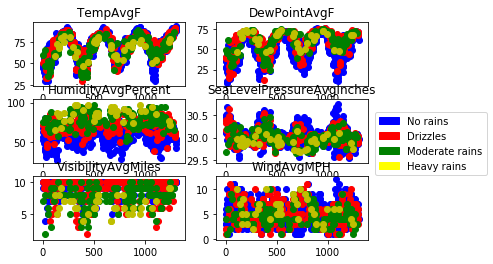

In [30]:
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.scatter(x1.index.values, x1[x1.columns.values[i]], color='b')
    plt.scatter(x2.index.values, x2[x2.columns.values[i]], color='r')
    plt.scatter(x3.index.values, x3[x3.columns.values[i]], color='g')
    plt.scatter(x4.index.values, x4[x4.columns.values[i]], color='y')
    plt.title(x1.columns.values[i])

blue_patch = mpatches.Patch(color='blue', label='No rains')
red_patch = mpatches.Patch(color='red', label='Drizzles')
green_patch = mpatches.Patch(color='green', label='Moderate rains')
yellow_patch = mpatches.Patch(color='yellow', label='Heavy rains')
plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch], bbox_to_anchor=(1.05, 2), loc=2, borderaxespad=0.)

plt.show()

Descriptio of plotts